In [2]:
import numpy as np
import matplotlib.pyplot as plt

#import sys
#sys.path.append('/home/buhmae/3_erum_data_data/erum_data_data/erum_data_data')
#import importlib
#import erum_data_data as edd
#importlib.reload(edd)

# or just:
import erum_data_data as edd

print('imports dones')

imports dones


In [4]:
# dataset description
edd.print_description('airshower')


    
Airshower Proton vs Iron Classification

Based on https://doi.org/10.1016/j.astropartphys.2017.10.006

Produced by jonas.glombitza@rwth-aachen.de
    
----------------------------------    
Dataset shape:

Three sets of input data:
- first set of input data:
    - 70k events (airshowers)
    - 81 ground detector stations
    - 81 features
        - 1  time   (arrival time of first particles at each station)
        - 80 measured signal traces
    -padding: (-1) padding for instances that the detector / or timestep did not detect a particle
    
- second set of input data:
    - 70k events (airshowers)
    - 11 features per airshower:
        'logE',  --> (energy of cosmic ray)
        'Xmax',  --> (depth of shower maximum)  
        'showermax_x', 'showermax_y', 'showermax_z',     --> (point of showermaximum in x,y,z)
        'showeraxis_x', 'showeraxis_y', 'showeraxis_z',  --> (shower axis (arrival direction) in x,y,z)
        'showercore_x', 'showercore_y', 'showercore_z',  -->

In [6]:
# load training and testing set
X_train, y_train = edd.load('airshower', 'train', cache_dir = '/home/buhmae/3_erum_data_data/erum_data_data', cache_subdir = 'datasets')
X_test, y_test = edd.load('airshower', 'test', cache_dir = '/home/buhmae/3_erum_data_data/erum_data_data', cache_subdir = 'datasets')

file was already downloaded
file was already downloaded


In [7]:
# checking basic content

print(len(X_train))
print(len(X_test))

print(X_train[0].shape)
print(X_train[1].shape)
print(X_train[2].shape)

print(y_train.shape)
print(y_test.shape)

3
3
(70000, 81, 81)
(70000, 11)
(81, 3)
(70000,)
(30000,)


# some basic plots

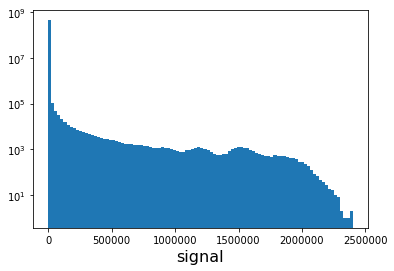

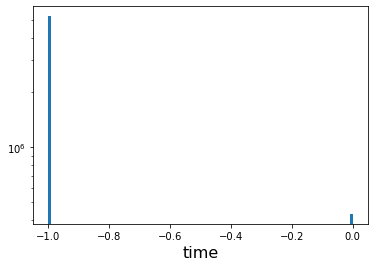

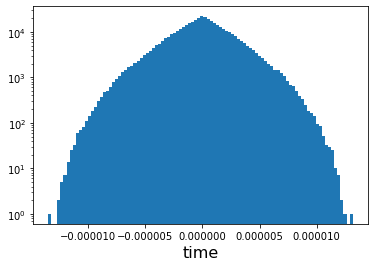

In [10]:
X = X_train[0]

# total signal histogram
plt.clf()
plt.hist(X[:,:,1:82].ravel(), bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('signal', fontsize=16)
plt.show()

# total time histogram
plt.clf()
plt.hist(X[:,:,0].ravel(), bins = 100)#, range=[-1,0.5])
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('time', fontsize=16)
plt.show()


# zoom on time without (-1) padding
X = X[:,:,0][X[:,:,0] > -1].ravel()

plt.clf()
plt.hist(X, bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('time', fontsize=16)
plt.show()

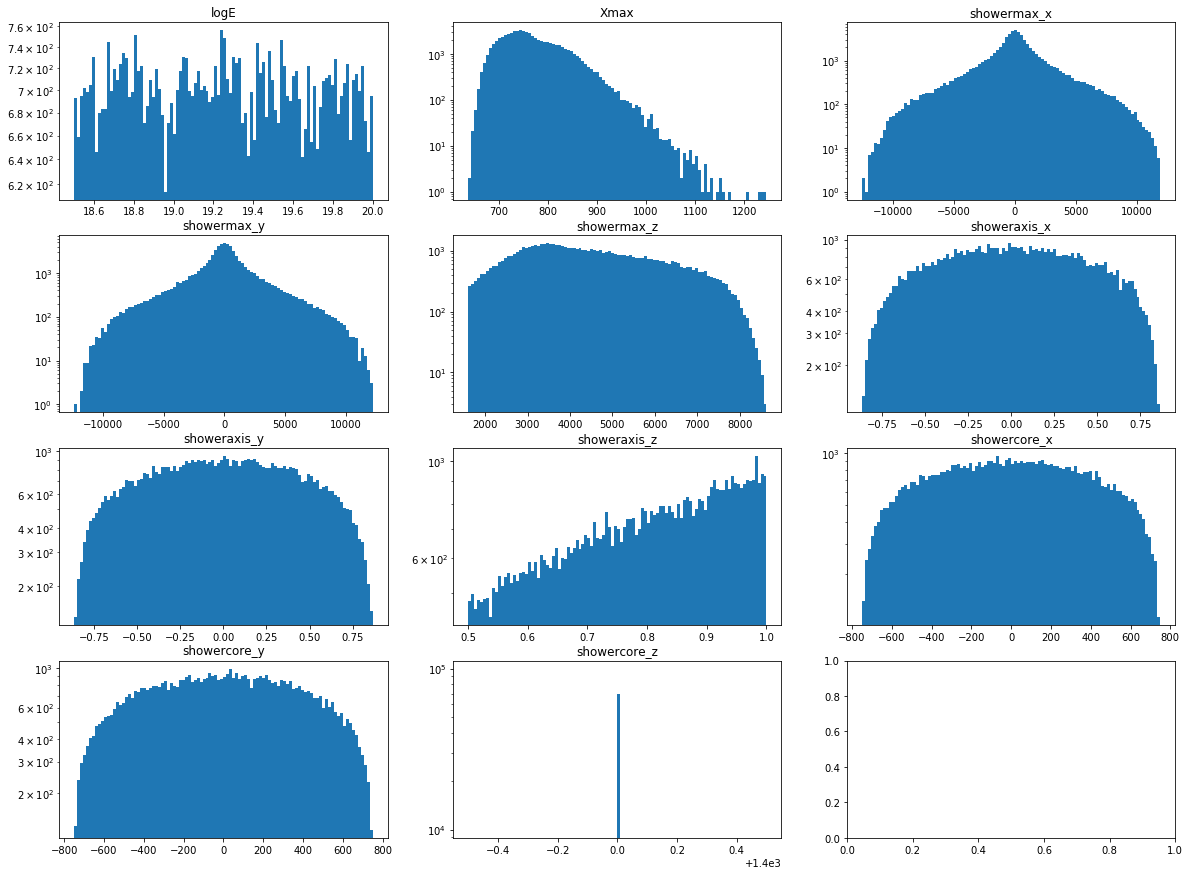

In [13]:
# the features - zeropadded
X = X_train[1]

label_list = ['logE', 'Xmax', 
              'showermax_x', 'showermax_y', 'showermax_z',
              'showeraxis_x', 'showeraxis_y', 'showeraxis_z',
              'showercore_x', 'showercore_y', 'showercore_z',
             ]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
for i, (name, ax) in enumerate(zip(label_list, np.array(axs).ravel())):
    ax.hist(X[:,i].ravel(), bins=100)
    ax.set_title(name)
    ax.set_yscale("log")

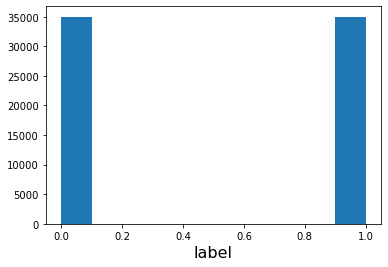

In [14]:
# labels
    
plt.clf()
plt.hist(y_train, bins=10)
plt.xlabel('label', fontsize=16)
plt.show()